# Bitcoin Price Prediction
using time series analysis


### Result so far
- 2013년~2020년 전체에 대한 공통의 추세와 계절성은 존재하지 않는다.

### 

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import re

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = pd.read_csv('./data/bitcoin_eda.csv', index_col=0)
df.head()

,date,close,volume,fluctuation,weighted_close,close_log,close_norm,volume_norm,weighted_close_norm
0,2013-01-01,13.3,28410.0,-1.55,377853.0,2.587764,0.000000,0.028034,0.000000e+00
1,2013-01-02,13.3,17970.0,0.00,239001.0,2.587764,0.000000,0.017585,0.000000e+00
2,2013-01-03,13.4,18030.0,0.90,241602.0,2.595255,0.000002,0.017645,3.073006e-08
3,2013-01-04,13.5,29640.0,0.75,400140.0,2.602690,0.000003,0.029265,1.019338e-07
4,2013-01-05,13.4,21330.0,-0.44,285822.0,2.595255,0.000002,0.020948,3.648214e-08


In [3]:
df.index = df['date']

In [15]:
model=sm.tsa.statespace.SARIMAX(df['close'], order=(3, 0, 1))
results=model.fit()
results.summary()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2981
Model:               SARIMAX(3, 0, 1)   Log Likelihood              -22102.591
Date:                Wed, 03 Mar 2021   AIC                          44215.181
Time:                        23:54:49   BIC                          44245.181
Sample:                    01-01-2013   HQIC                         44225.976
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0469      0.010      4.927      0.000       0.028       0.066
ar.L2          0.9728      0.009    109.825      0.000       0.955       0.990
ar.L3         -0.0199      0.006     -3.364      0.001      -0.032      -0.008
ma.L1          0.9857      0.008    123.681      0.000       0.970       1.001
sigma2      1.606e+05    784.509    204.703      0.000    1.59e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            677303.25
Prob(Q):                              0.93   Prob(JB):                         0.00
Heteroskedasticity (H):             375.06   Skew:                             2.08
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [16]:
results.forecast(steps=1)

2021-03-01    45055.770558
Freq: D, dtype: float64

In [17]:
results.forecast(steps=3)

2021-03-01    45055.770558
2021-03-02    45129.614506
2021-03-03    45047.162746
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:>

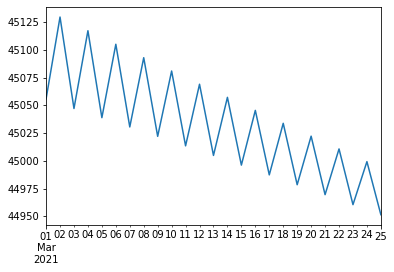

In [18]:
results.forecast(steps=25).plot()

<AxesSubplot:>

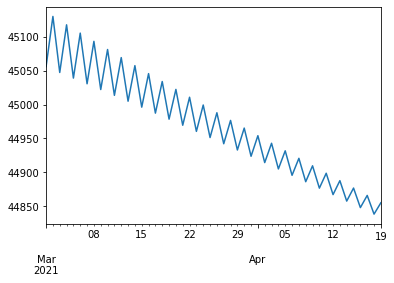

In [19]:
#df['close'].plot()
results.forecast(steps=50).plot()

<AxesSubplot:>

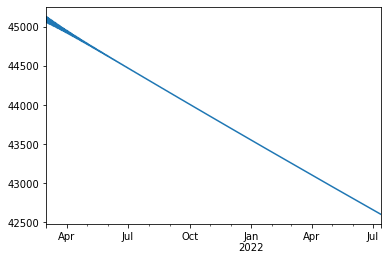

In [20]:
results.forecast(steps=500).plot()

In [80]:
model=sm.tsa.statespace.SARIMAX(df['close'], order=(2, 0, 1))
results=model.fit()
results.summary()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  close   No. Observations:                 2981
Model:               SARIMAX(2, 0, 1)   Log Likelihood              -22103.129
Date:                Wed, 03 Mar 2021   AIC                          44214.257
Time:                        18:42:42   BIC                          44238.257
Sample:                    01-01-2013   HQIC                         44222.893
                         - 02-28-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0343      0.010      3.408      0.001       0.015       0.054
ar.L2          0.9655      0.010     95.472      0.000       0.946       0.985
ma.L1          0.9805      0.009    107.769      0.000       0.963       0.998
sigma2      1.609e+05    781.937    205.829      0.000    1.59e+05    1.62e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.83   Jarque-Bera (JB):            670988.94
Prob(Q):                              0.36   Prob(JB):                         0.00
Heteroskedasticity (H):             374.88   Skew:                             2.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        76.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [81]:
results.forecast(steps=3)

2021-03-01    45069.327058
2021-03-02    45151.600863
2021-03-03    45063.017390
Freq: D, Name: predicted_mean, dtype: float64

<AxesSubplot:>

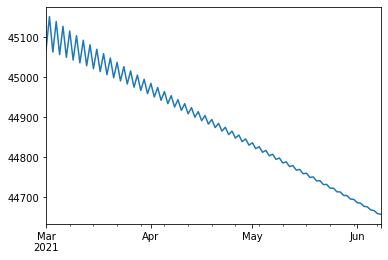

In [82]:
results.forecast(steps=100).plot()

<AxesSubplot:>

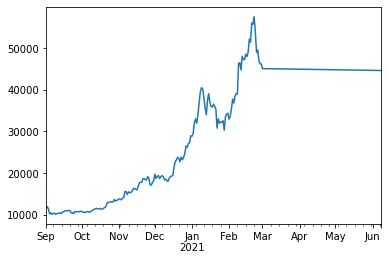

In [88]:
pd.concat([results.predict(start=2800, end=len(df)-1), results.forecast(steps=100)]).plot()

# Forecast vs. Predict?
https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/

In [89]:
len(df)-1

2980

In [92]:
df['close']

date
2013-01-01       13.3
2013-01-02       13.3
2013-01-03       13.4
2013-01-04       13.5
2013-01-05       13.4
               ...   
2021-02-24    49697.5
2021-02-25    46928.5
2021-02-26    46345.6
2021-02-27    46136.7
2021-02-28    45164.0
Name: close, Length: 2981, dtype: float64

In [94]:
df.index[-1]

'2021-02-28'

In [95]:
from pandas.tseries.offsets import DateOffset
future_dates=[df.index[-1]+ DateOffset(days=x)for x in range(0,21)]
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=df.columns)

TypeError: can only concatenate str (not "relativedelta") to str

<AxesSubplot:>

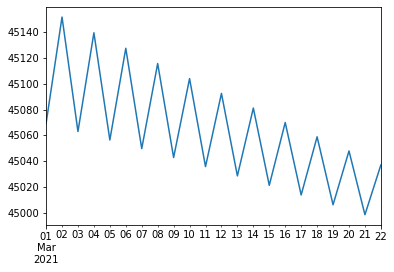

In [99]:
results.predict(start = 2981, end = 3002, dynamic= True).plot()

In [90]:

future_datest_df.tail()

future_df=pd.concat([df,future_datest_df])

future_df['forecast'] = results.predict(start = 2981, end = 3002, dynamic= True)
future_df[['Sales', 'forecast']].plot(figsize=(12, 8))

TypeError: can only concatenate str (not "relativedelta") to str

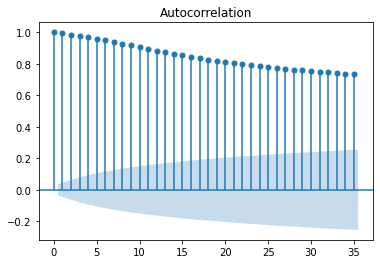

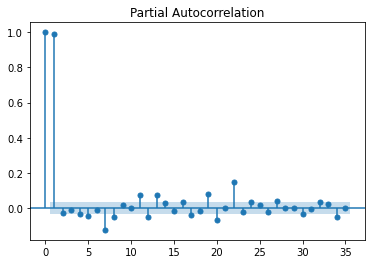

In [13]:
plot_acf(df)
plot_pacf(df)
plt.show()

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


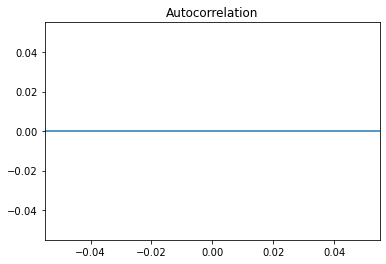

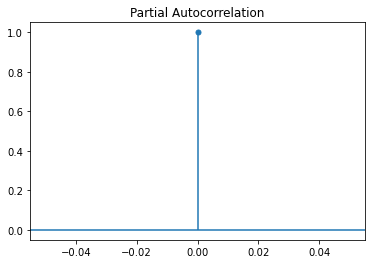

In [21]:
close_diff1 = df.diff(periods=1)
#close_diff1.plot()
plot_acf(close_diff1)
plot_pacf(close_diff1)
plt.show()

# PMDARIMA
https://medium.com/@josemarcialportilla/using-python-and-auto-arima-to-forecast-seasonal-time-series-90877adff03c

In [56]:
from pmdarima import auto_arima

In [57]:
stepwise_model = auto_arima(df['close'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=3.00 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=45929.322, Time=0.09 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=45239.326, Time=1.06 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=2.00 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=45926.380, Time=0.13 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=44834.986, Time=2.46 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=9.27 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=3.59 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=44834.949, Time=1.26 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=45237.351, Time=0.39 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=6.91 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=2.23 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=44834.890, Time=2.74 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=45239.326, Time=1.05 sec
 ARIMA(0,1,1)(2,1,1)[12]             : AI

KeyboardInterrupt: 

In [58]:
stepwise_model = auto_arima(df['close'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=False,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

/opt/anaconda3/envs/AI_dev/lib/python3.7/site-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=44178.906, Time=1.47 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=44191.701, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=44191.322, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=44191.395, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=44193.942, Time=0.03 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=44179.670, Time=1.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=44186.472, Time=1.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=44192.843, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=44192.516, Time=0.09 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=44175.343, Time=2.78 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=44163.859, Time=2.72 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=44161.602, Time=0.82 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=44174.950, Time=0.21 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=44162.601, Time=0.38 sec

Best model:  ARIMA

In [61]:
stepwise_model = auto_arima(df['close'].iloc[:1000], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=1.41 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=10339.668, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=10087.629, Time=0.32 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.59 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=10341.223, Time=0.06 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=9967.332, Time=0.72 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.90 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=9967.458, Time=0.53 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=9923.957, Time=0.93 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=10044.840, Time=0.46 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.71 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=1.07 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=9924.050, Time=1.13 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=99

KeyboardInterrupt: 